# Homework 1. PCA and MDS

### NGUYEN, Huu Canh
### SID: 20818623

## Q1. PCA experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set up data matrix X
raw_data = pd.read_csv('train.7.txt')
data = np.array(raw_data,dtype='float32')
data = np.transpose(data)
data.shape

(256, 644)

In [3]:
# Compute the sample mean
mu = np.mean(data, axis=1)
X_tidle = data - mu[:,None]

In [4]:
# Compute top k SVD
u, s, vh = np.linalg.svd(X_tidle)

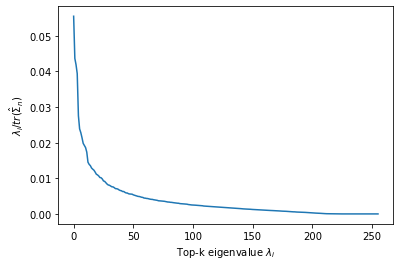

In [5]:
# Plot eigenvalue curve
plt.plot(s/s.sum())
plt.xlabel(r"Top-k eigenvalue $\lambda_i$")
plt.ylabel(r"$\lambda_i / tr(\hat \Sigma_n)$")
plt.show()

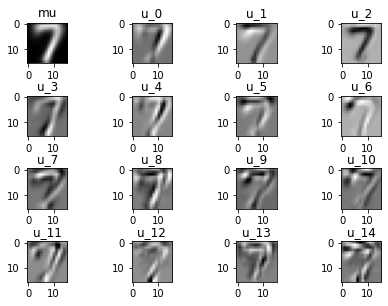

In [6]:
# Use imshow to visualize the mean and top-k principle components as left singular vectors
k = 15

fig, axs = plt.subplots(int(np.ceil((k+1)/4)), 4)
axs[0,0].imshow(np.reshape(mu,(16,16)),cmap='gray')
axs[0,0].set_title('mu')

for i in range(k):
    axs[int(np.floor((i+1)/4)), (i+1)%4].imshow(np.reshape(u[:,i],(16,16)), cmap='gray')
    axs[int(np.floor((i+1)/4)), (i+1)%4].set_title(f'u_{i}')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.,
                    top=1.,
                    wspace=0.4,
                    hspace=0.8)
plt.show()


In [7]:
# For k = 1, order the images (xi) according to the top first right singular vector, v1, 
# in an ascending order of v1(i);
np.argsort(vh[0])

array([376, 279, 209, 440, 384, 265, 562, 322, 235, 261, 151,  20,  75,
       426, 118,  86, 321, 610, 563, 462, 148, 202, 434, 574, 278, 478,
       561, 590, 617, 108, 289, 373, 205, 400, 159, 169, 155, 488, 541,
       172, 485, 631,  26,   2, 360, 520,  58, 608, 396, 367, 347, 356,
        54, 204, 355, 366, 293, 498, 365, 161, 611, 449, 276, 472,  70,
       550, 414, 615, 579, 122, 442, 487, 589,  49, 140, 639, 379, 476,
       191, 178, 407,  25, 578,  98, 463, 326, 586, 263, 117, 227, 484,
        34,  37, 111, 332,  96, 110, 164,  55, 316,  21, 410,  52,  23,
       354, 585, 312,  14,  69, 253, 482, 368, 320, 595, 636, 244,  65,
         1, 477, 245, 454, 419, 177,  90, 551, 275, 468, 231,   4, 524,
         5, 248,  41, 324, 228, 149,  62, 334, 486, 333, 271,  97, 362,
       546,   6, 406, 287, 530, 511, 531, 250, 451, 408, 393, 247, 437,
       622, 643, 635, 601, 576, 337, 416,  68, 535, 560, 119,  80, 351,
       266, 633, 350, 418,  61, 256,  39, 584, 168, 515, 139, 33

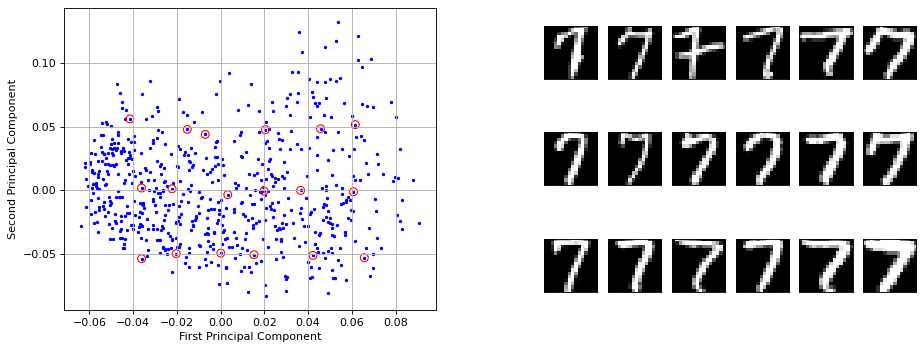

In [8]:
# For k = 2, scatter plot (v1; v2) and select a grid on such a plane to show those images
# on the grid

fig = plt.figure(figsize=(12, 5), dpi=80)
subfigs = fig.subfigures(1, 2)
ax_left = subfigs[0].subplots()
ax_right = subfigs[1].subplots(3,6)
ax_left.scatter(vh[0], vh[1], color="blue", s=4)
ax_left.set_xlabel("First Principal Component")
ax_left.set_ylabel("Second Principal Component")
ax_left.grid(True)

for second in np.arange(3):
    for first in np.arange(6):
        distance_to_grid = (vh[0]-(first*0.02-0.04))**2 + (vh[1]-(-second*0.05+0.05))**2
        min_index = np.argmin(distance_to_grid)
        ax_left.scatter(vh[0,min_index], vh[1,min_index], s=50, facecolors='none', edgecolors='r')
        ax_right[second,first].imshow(np.reshape(data[:,min_index],(16,16)), cmap='gray')
        ax_right[second,first].set_xticks([])
        ax_right[second,first].set_yticks([])
plt.show()

## Q2. MDS of cities

In [9]:
# Cities: Hanoi, Ho Chi Minh City, Bangkok, Hong Kong, Manila, Singapore, Jakarta, Kuala Lumpur
D = np.array([[0, 1143.52, 988.01, 869.22, 1752.56, 2205.60, 3026.71, 2037.33],
             [1143.52, 0, 750.42, 1505.23, 1604.75, 1100.91, 1884.95, 1010.30],
             [988.01, 750.42, 0, 1725.68, 2208.39, 1434.09, 2323.35, 1186.12],
             [869.22, 1505.23, 1725.68, 0, 1117.70, 2586.78, 3263.36, 2514.96],
             [1752.56, 1604.75, 2208.39, 1117.70, 0, 2392.52, 2785.90, 2464.77],
             [2205.60, 1100.91, 1434.09, 2586.78, 2392.52, 0, 893.36, 315.07],
             [3026.71, 1884.95, 2323.35, 3263.36, 2785.90, 893.36, 0, 1182.4],
             [2037.33, 1010.30, 1186.12, 2514.96, 2464.77, 315.07, 1182.4, 0]] )

In [10]:
# Multidimensional Scaling algorithm
k = 2
n = D.shape[0]
H = np.eye(n) - 1/n*np.ones((n,n))
B = -1/2*H*D*np.transpose(H)
u, s, vh = np.linalg.svd(B)
lambda_k = np.diag(s[:k])
u_k = u[:,:k]
X_tidle = np.dot(np.sqrt(lambda_k),np.transpose(u_k))

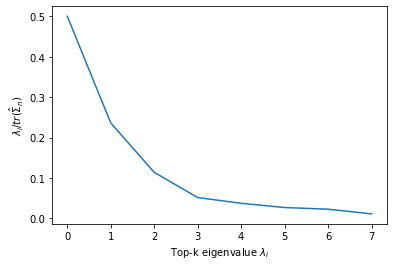

In [11]:
# Plot the normalized eigenvalues
plt.plot(s/s.sum())
plt.xlabel(r"Top-k eigenvalue $\lambda_i$")
plt.ylabel(r"$\lambda_i / tr(\hat \Sigma_n)$")
plt.show()

All eigenvalues are nonnegative. On the other hand, negative eigenvalues indicate that the distances are non-euclidean, which means that no euclidean model will fit perfectly.

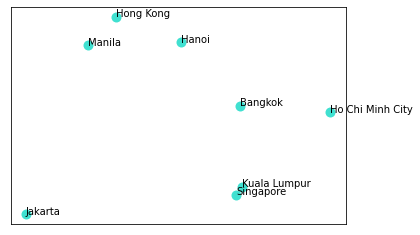

In [12]:
# Make a scatter plot of those cities
plt.scatter(X_tidle[0], X_tidle[1], color="turquoise", s=100, lw=0, label="MDS")
cities = ['Hanoi', 'Ho Chi Minh City', 'Bangkok', 'Hong Kong', 'Manila', 'Singapore', 'Jakarta', 'Kuala Lumpur']
for i, txt in enumerate(cities):
    plt.annotate(txt, (X_tidle[0,i], X_tidle[1,i]))
    
plt.xticks([])
plt.yticks([])
plt.show()

## Q3. Positive Semi-definiteness

### a) Its eigenvalues are all nonnegative

Let $PDP^{-1}$ be an eigendecomposition of $K$, where $P$ is a unitary complex matrix whose columns comprise an orthonormal basis of eigenvectors of $K$ and $D$ is a real diagonal matrix whose main diagonal contains the corresponding eigenvalues.

The one-to-one change of variable $y=P^{-1}x$ brings $x^{T}Kx$ to:

$x^{T}Kx = x^{T}PDP^{-1}x = y^{T} P^{T} P D y = y^{T} D y = \lambda_1 y_1^2 +...+ \lambda_n y_n^2$

where $\lambda_i$ are eigenvalues of $K$. It is clear that this sum is positive $\forall y \neq 0$ if and only if all $\lambda_i$ are positive.

### b) Squared distance function

$K \succeq 0 \Leftrightarrow \exists Y: K = Y^T Y = \sum_k Y_{i,k}Y_{k,j}$

$d_{i,j} = K_{ii} + K{jj} - 2K{ij} = \sum_k Y_{i,k}Y_{k,i} + \sum_k Y_{j,k}Y_{k,j} - 2\sum_k Y_{i,k}Y_{k,j}
= \sum_k Y^2_{i,k} + \sum_k Y^2_{j,k} - 2\sum_k Y_{i,k}Y_{k,j} = \sum_k (Y_{i,k} - Y_{j,k})^2$. (Q.E.D)

### c) Householder centering matrix
For all $x \in \mathbb{R}^n$:
$$
x^T B_\alpha x = -\dfrac{1}{2} x^T H_\alpha D H_\alpha^T x = -\dfrac{1}{2} (H_\alpha^T x)^T D (H_\alpha^T x)
$$

Since $\mathbf{1}^T H^T_\alpha x = \mathbf{1}^T (\mathbf{I} - \alpha \mathbf{1}^T)x = (1-\mathbf{1}^T \alpha)\mathbf{1}^T x = 0$ and $D$ is conditionally negative definite, we have:
$$
x^T B_\alpha x = -\dfrac{1}{2} x^T H_\alpha D H_\alpha^T x \geq 0
$$

So, $B_\alpha \succeq 0$. (Q.E.D)

### d) Elementwise sum and elementwise product
#### d.1) Elementwise sum:

$\forall x \in \mathbb{R}^n, x^{T} (A+B) x =  x^{T} A x + x^{T} B x \geq 0$. Therefore, $A+B \succeq 0$.

#### d.2)  Elementwise product:

Let $A$ and $B$ be positive semidefinite matrices of size $n$. 

- Suppose $B$ is of rank zero. This is true if and only if $B=\mathcal{O}$, and therefore $A \circ B=\mathcal{O}$, which is clearly positive semidefinite.

- Now suppose $B$ is of rank one. Then we can write $B=\mathbf{x x}^T$ for some vector $\mathbf{x} \in \mathbf{R}^n$. Then $[A \circ B]_{i j}=[A]_{i j}[B]_{i j}=[A]_{i j}[\mathbf{x}]_i\left[\mathbf{x}^T\right]_j=\left[D_{\mathbf{x}} A D_{\mathbf{x}}\right]_{i j}$, where $D_{\mathbf{x}}$ is a diagonal marix whose diagonal vector is $\mathbf{x}$. Take any vector $\mathbf{v} \in \mathbf{R}^n$:
$$
\begin{aligned}
v^{T} D_{\mathbf{x}} A D_{\mathbf{x}} v &= (D^T_{\mathbf{x}} v)^{T} A (D_\mathbf{x} v)\\
&= (D_{\mathbf{x}} v)^{T} A (D_\mathbf{x} v)\\
&\geq 0
\end{aligned}
$$
Since $A \succeq 0$, then so is $D_{\mathbf{x}} A D_{\mathbf{x}}$.

- Now suppose $B$ is of rank $r, 1<r \leq n$. Then we can decompose $B$ into a sum of rank one matrices $B_1, \ldots, B_r$ where each matrix $B_i$ is also positive semidefinite (since all eigenvalues are all nonnegative). Then $A \circ B=A \circ\left(B_1+\ldots+B_r\right)=A \circ B_1+\ldots+A \circ B_r$. We know that each $A \circ B_i$ is positive semidefinite for each $i$, and so $A \circ B$ is positive semidefinite.

Therefore for any two positive semidefinite matrices $A$ and $B, A \circ B$ is also positive semidefinite.

## Q4. Distance

### a) Is $d^2$ a distance function?
NO. In case $p=1$, let X=0, Y=3, Z=4, we have:

$d^2(X,Z) = 16 \geq 9+1 = d^2(X,Y) + d^2(Y,Z)$

### b) Is $\sqrt{d}$ a distance function?
We need to show that the four following properties hold for $d^2$ to be a metric:
1. If $X, Y \in \mathbb{R}^p$ then $d^{1/2}(X, Y) \geq 0$:
Trivial

2. $d^{1/2}(X,Y) = 0$ if and only if $X=Y$:

$d^{1/2}(X,Y) = 0 \Leftrightarrow d(X,Y) = 0 \Leftrightarrow X=Y$. The second "$\Leftrightarrow$" is because $d$ is a distance function.

3. If $X,Y \in \mathbb{R}^p$ then $d^{1/2}(X,Y)=d^{1/2}(Y,X)$:

Since $d$ is a distance function, $\forall X,Y \in \mathbb{R}^p$, we have $d(X,Y)=d(Y,X) \Rightarrow d^{1/2}(X,Y)=d^{1/2}(Y,X) $

4. If $X,Y, Z \in \mathbb{R}^p$ then $d^{1/2}(X,Y) \leq d^{1/2}(Y,Z) + d^{1/2}(Z,X)$.

Again, from the fact that $d$ is a distance function, 

$d(X,Y) \leq d(Y,Z) + d(Z,X) \leq d(Y,Z) + d(Z,X) + 2 d^{1/2}(Y,Z) d^{1/2}(Z,X) = (d^{1/2}(Y,Z) + d^{1/2}(Z,X))^2$

$\Rightarrow d^{1/2}(X,Y) \leq d^{1/2}(Y,Z) + d^{1/2}(Z,X)$ (Q.E.D)

So the answer is YES.